# Machine Learning Engineer Nanodegree
## Model Evaluation & Validation
## Project: Predicting Boston Housing Prices

Welcome to the first project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started
In this project, you will evaluate the performance and predictive power of a model that has been trained and tested on data collected from homes in suburbs of Boston, Massachusetts. A model trained on this data that is seen as a *good fit* could then be used to make certain predictions about a home — in particular, its monetary value. This model would prove to be invaluable for someone like a real estate agent who could make use of such information on a daily basis.

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Housing). The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts. For the purposes of this project, the following preprocessing steps have been made to the dataset:
- 16 data points have an `'MEDV'` value of 50.0. These data points likely contain **missing or censored values** and have been removed.
- 1 data point has an `'RM'` value of 8.78. This data point can be considered an **outlier** and has been removed.
- The features `'RM'`, `'LSTAT'`, `'PTRATIO'`, and `'MEDV'` are essential. The remaining **non-relevant features** have been excluded.
- The feature `'MEDV'` has been **multiplicatively scaled** to account for 35 years of market inflation.

Run the code cell below to load the Boston housing dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

      RM  LSTAT  PTRATIO      MEDV
0  6.575   4.98     15.3  504000.0
1  6.421   9.14     17.8  453600.0
2  7.185   4.03     17.8  728700.0
3  6.998   2.94     18.7  701400.0
4  7.147   5.33     18.7  760200.0
5  6.430   5.21     18.7  602700.0
6  6.012  12.43     15.2  480900.0
7  6.172  19.15     15.2  569100.0
8  5.631  29.93     15.2  346500.0
9  6.004  17.10     15.2  396900.0
        RM  LSTAT  PTRATIO      MEDV
479  5.390  21.14     19.2  413700.0
480  5.794  14.10     19.2  384300.0
481  6.019  12.92     19.2  445200.0
482  5.569  15.10     19.2  367500.0
483  6.027  14.33     19.2  352800.0
484  6.593   9.67     21.0  470400.0
485  6.120   9.08     21.0  432600.0
486  6.976   5.64     21.0  501900.0
487  6.794   6.48     21.0  462000.0
488  6.030   7.88     21.0  249900.0
Boston housing dataset has 489 data points with 4 variables each.


(array([ 19.,  49.,  55.,  50.,  56.,  40.,  45.,  39.,  40.,  22.,  17.,
         11.,  12.,   9.,   6.,  10.,   3.,   2.,   2.,   2.]),
 array([  1.98  ,   3.7795,   5.579 ,   7.3785,   9.178 ,  10.9775,
         12.777 ,  14.5765,  16.376 ,  18.1755,  19.975 ,  21.7745,
         23.574 ,  25.3735,  27.173 ,  28.9725,  30.772 ,  32.5715,
         34.371 ,  36.1705,  37.97  ]),
 <a list of 20 Patch objects>)

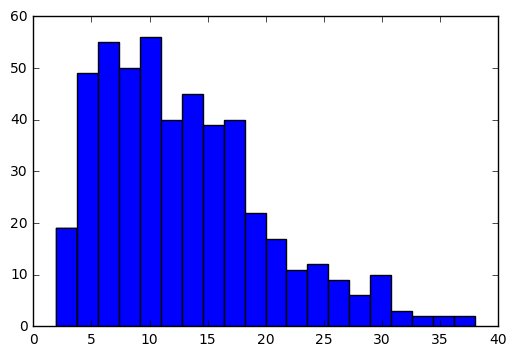

In [11]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from sklearn.model_selection import ShuffleSplit
import matplotlib.pyplot as plt

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Boston housing dataset
data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)

print data.head (n=10)
print data.tail(n=10)

# Success
print "Boston housing dataset has {} data points with {} variables each.".format(*data.shape)

plt.hist(data.LSTAT, bins = 20) # => shows the dataset is skewed towards lower prices

# plt.hist(np.log(data.LSTAT), bins = 20)

## Data Exploration
In this first section of this project, you will make a cursory investigation about the Boston housing data and provide your observations. Familiarizing yourself with the data through an explorative process is a fundamental practice to help you better understand and justify your results.

Since the main goal of this project is to construct a working model which has the capability of predicting the value of houses, we will need to separate the dataset into **features** and the **target variable**. The **features**, `'RM'`, `'LSTAT'`, and `'PTRATIO'`, give us quantitative information about each data point. The **target variable**, `'MEDV'`, will be the variable we seek to predict. These are stored in `features` and `prices`, respectively.

### Implementation: Calculate Statistics
For your very first coding implementation, you will calculate descriptive statistics about the Boston housing prices. Since `numpy` has already been imported for you, use this library to perform the necessary calculations. These statistics will be extremely important later on to analyze various prediction results from the constructed model.

In the code cell below, you will need to implement the following:
- Calculate the minimum, maximum, mean, median, and standard deviation of `'MEDV'`, which is stored in `prices`.
  - Store each calculation in their respective variable.

Statistics for Boston housing dataset:

Minimum price: $105,000.00
Maximum price: $1,024,800.00
Mean price: $454,342.94
Median price $438,900.00
Standard deviation of prices: $165,171.13



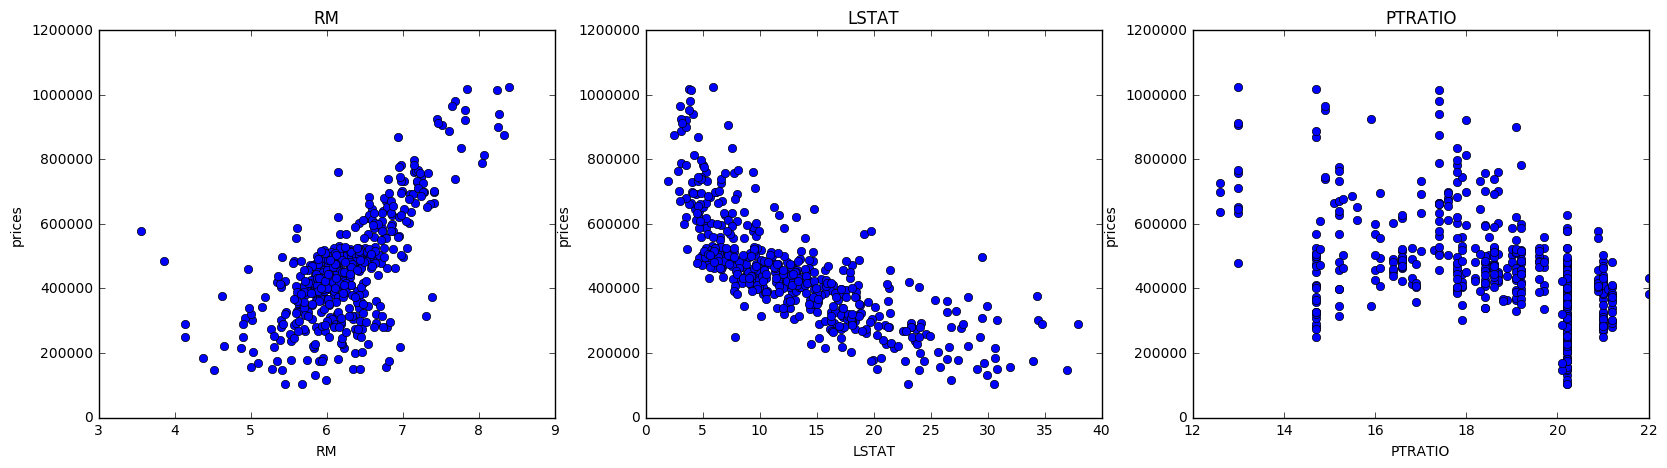

In [12]:
# TODO: Minimum price of the data
minimum_price = np.min(prices)

# TODO: Maximum price of the data
maximum_price = np.max(prices)

# TODO: Mean price of the data
mean_price = np.mean(prices)

# TODO: Median price of the data
median_price = np.median(prices)

# TODO: Standard deviation of prices of the data
std_price = np.std(prices)

# Show the calculated statistics
print "Statistics for Boston housing dataset:\n"
print "Minimum price: ${:,.2f}".format(minimum_price)
print "Maximum price: ${:,.2f}".format(maximum_price)
print "Mean price: ${:,.2f}".format(mean_price)
print "Median price ${:,.2f}".format(median_price)
print "Standard deviation of prices: ${:,.2f}".format(std_price)
print ""

plt.figure(figsize=(20, 5))

for i, col in enumerate(features.columns):
    # print "sema1", i, "", col, ""
    plt.subplot(1, 3, i+1)
    plt.plot(data[col], prices, 'o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('prices')

### Question 1 - Feature Observation
As a reminder, we are using three features from the Boston housing dataset: `'RM'`, `'LSTAT'`, and `'PTRATIO'`. For each data point (neighborhood):
- `'RM'` is the average number of rooms among homes in the neighborhood.
- `'LSTAT'` is the percentage of homeowners in the neighborhood considered "lower class" (working poor).
- `'PTRATIO'` is the ratio of students to teachers in primary and secondary schools in the neighborhood.

_Using your intuition, for each of the three features above, do you think that an increase in the value of that feature would lead to an **increase** in the value of `'MEDV'` or a **decrease** in the value of `'MEDV'`? Justify your answer for each._  
**Hint:** Would you expect a home that has an `'RM'` value of 6 be worth more or less than a home that has an `'RM'` value of 7?

**Answer: **

Regarding RM: investigatting head and tail, I intuit that a higher RM will mean a less dense area with houses and villas, instead of flats, i.e. higher home prices

Regarding LSTAT: generally speaking, the higher this number, the lower the prices of homes, unfortunately. There could be an exception if Boston has a program to spread "social/subsidised flats" and other lower class buildings all other the city (to avoid concentration in gettos and avoid problem areas). So I expect a negative correlation between prices and level of poverty, but this needs to be checked, even if head and tail kind of confirm this.

Regarding PTRATIO: this one is not so clear. I would intuit that higher ratios means classrooms are more filled out, i.e. that the schools are underdimensionned, or that there is a higher people density in the neighborhood, or that the education system has under-budgeted the area... From the head and tail data, I see some datapoints where high student/teacher ratio have low prices, but it is not so clear...

----

## Developing a Model
In this second section of the project, you will develop the tools and techniques necessary for a model to make a prediction. Being able to make accurate evaluations of each model's performance through the use of these tools and techniques helps to greatly reinforce the confidence in your predictions.

### Implementation: Define a Performance Metric
It is difficult to measure the quality of a given model without quantifying its performance over training and testing. This is typically done using some type of performance metric, whether it is through calculating some type of error, the goodness of fit, or some other useful measurement. For this project, you will be calculating the [*coefficient of determination*](http://stattrek.com/statistics/dictionary.aspx?definition=coefficient_of_determination), R<sup>2</sup>, to quantify your model's performance. The coefficient of determination for a model is a useful statistic in regression analysis, as it often describes how "good" that model is at making predictions. 

The values for R<sup>2</sup> range from 0 to 1, which captures the percentage of squared correlation between the predicted and actual values of the **target variable**. A model with an R<sup>2</sup> of 0 is no better than a model that always predicts the *mean* of the target variable, whereas a model with an R<sup>2</sup> of 1 perfectly predicts the target variable. Any value between 0 and 1 indicates what percentage of the target variable, using this model, can be explained by the **features**. _A model can be given a negative R<sup>2</sup> as well, which indicates that the model is **arbitrarily worse** than one that always predicts the mean of the target variable._

For the `performance_metric` function in the code cell below, you will need to implement the following:
- Use `r2_score` from `sklearn.metrics` to perform a performance calculation between `y_true` and `y_predict`.
- Assign the performance score to the `score` variable.

In [13]:
# TODO: Import 'r2_score'
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true,y_predict)
    
    # Return the score
    return score

### Question 2 - Goodness of Fit
Assume that a dataset contains five data points and a model made the following predictions for the target variable:

| True Value | Prediction |
| :-------------: | :--------: |
| 3.0 | 2.5 |
| -0.5 | 0.0 |
| 2.0 | 2.1 |
| 7.0 | 7.8 |
| 4.2 | 5.3 |
*Would you consider this model to have successfully captured the variation of the target variable? Why or why not?* 

Run the code cell below to use the `performance_metric` function and calculate this model's coefficient of determination.

In [14]:
# Calculate the performance of this model
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print "Model has a coefficient of determination, R^2, of {:.3f}.".format(score)

Model has a coefficient of determination, R^2, of 0.923.


**Answer:** R2 = 0.923, a value close to 1 so this model is "good but not perfect" at predicting the target variable. 

### Implementation: Shuffle and Split Data
Your next implementation requires that you take the Boston housing dataset and split the data into training and testing subsets. Typically, the data is also shuffled into a random order when creating the training and testing subsets to remove any bias in the ordering of the dataset.

For the code cell below, you will need to implement the following:
- Use `train_test_split` from `sklearn.cross_validation` to shuffle and split the `features` and `prices` data into training and testing sets.
  - Split the data into 80% training and 20% testing.
  - Set the `random_state` for `train_test_split` to a value of your choice. This ensures results are consistent.
- Assign the train and testing splits to `X_train`, `X_test`, `y_train`, and `y_test`.

In [15]:
# TODO: Import 'train_test_split'

from sklearn.cross_validation import train_test_split

# TODO: Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size = 0.2, random_state = 21)

# Success
print "Training and testing split was successful."

Training and testing split was successful.


### Question 3 - Training and Testing
*What is the benefit to splitting a dataset into some ratio of training and testing subsets for a learning algorithm?*  
**Hint:** What could go wrong with not having a way to test your model?

**Answer: ** 

It is very important to "test" a model with datapoints which where NOT used to "train" the model, otherwise we will think that the model is accurate whereas the model is not accurate in reality. This is why it is important to split the dataset into non-overlapping training subset and testing subset. 

Now concerning the ratio, it is a trade-off, because more testing datapoints will give an accuracy closer to the reality, but at the expense of the model which can then only be trained with less datapoints. Taking less datapoints for testing means less "reality checks" of the model but more datapoints for the model to train, so a better training.

If you take all datapoints of the dataset to train the model, i.e. no datapoint for testing, then you have a model which is correctly trained according to the dataset: so in this case one could say, this model is correctly trained, I don't need to test it... BUT it could be that the dataset has a "problem" (see next § for a possible "problem") leading to a trained model which has high variability/variance and/or high bias, and you will never have the possibility to see it, because you need testing datapoints to see this. Without testing datapoints, it is not possible to estimate bias and variance, i.e. know the true performance of the model.

§ "a possible problem of the dataset": in our example here, the mean is slightly higher than the median, so it looks that homes with lower prices are over-represented in comparison to higher prices in this dataset (dataset slightly skewed towasrds lower prices): this could be a possible problem as mentioned in the § above

----

## Analyzing Model Performance
In this third section of the project, you'll take a look at several models' learning and testing performances on various subsets of training data. Additionally, you'll investigate one particular algorithm with an increasing `'max_depth'` parameter on the full training set to observe how model complexity affects performance. Graphing your model's performance based on varying criteria can be beneficial in the analysis process, such as visualizing behavior that may not have been apparent from the results alone.

### Learning Curves
The following code cell produces four graphs for a decision tree model with different maximum depths. Each graph visualizes the learning curves of the model for both training and testing as the size of the training set is increased. Note that the shaded region of a learning curve denotes the uncertainty of that curve (measured as the standard deviation). The model is scored on both the training and testing sets using R<sup>2</sup>, the coefficient of determination.  

Run the code cell below and use these graphs to answer the following question.

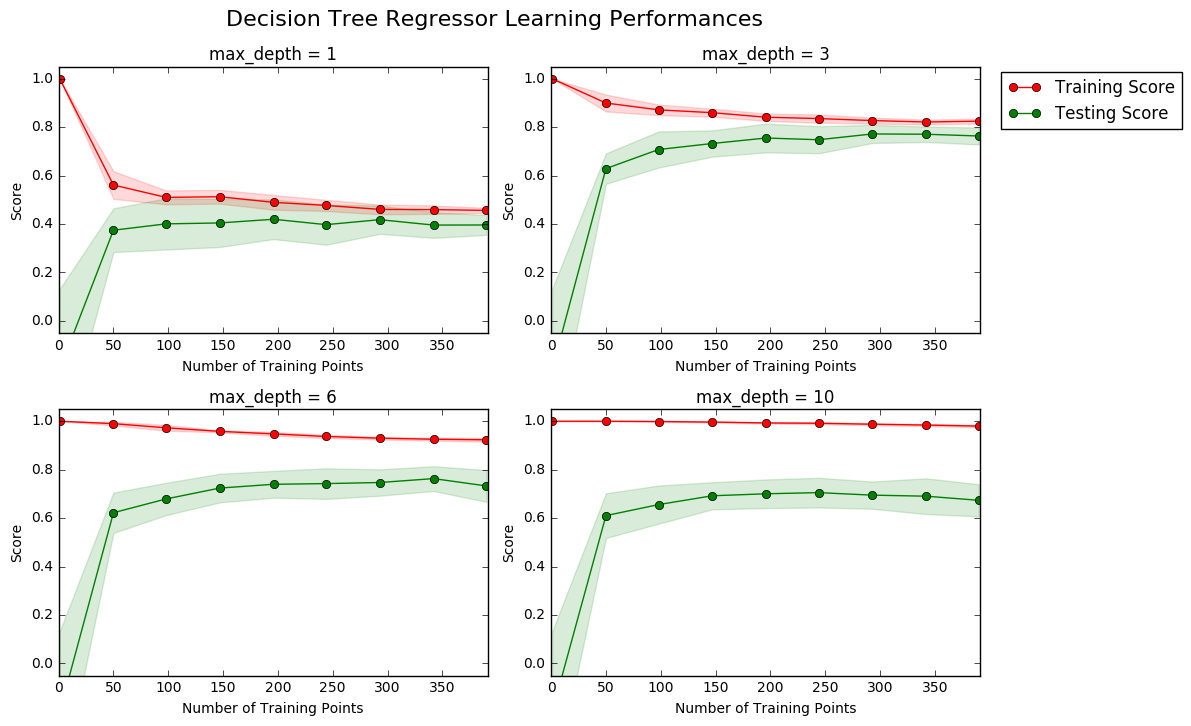

In [16]:
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(features, prices)

### Question 4 - Learning the Data
*Choose one of the graphs above and state the maximum depth for the model. What happens to the score of the training curve as more training points are added? What about the testing curve? Would having more training points benefit the model?*  
**Hint:** Are the learning curves converging to particular scores?

**Answer: ** 

For "max_depth = 6", the score of the training curve slightly decreases (as the number of training points increeases), and the score of the testing curve increases and plateaus around 0,75 as the number of training points increases. Specifically for this max_depth, 200 training points is enough and adding more doesn't bring anything. But both curves don't come closer to each other, so it seems a value of 6 for max_depth has introduced a bias, i.e. the value of 6 for "max-depth" is too high and forces the model to look for a high complexity that doesn't exist. 

### Complexity Curves
The following code cell produces a graph for a decision tree model that has been trained and validated on the training data using different maximum depths. The graph produces two complexity curves — one for training and one for validation. Similar to the **learning curves**, the shaded regions of both the complexity curves denote the uncertainty in those curves, and the model is scored on both the training and validation sets using the `performance_metric` function.  

Run the code cell below and use this graph to answer the following two questions.

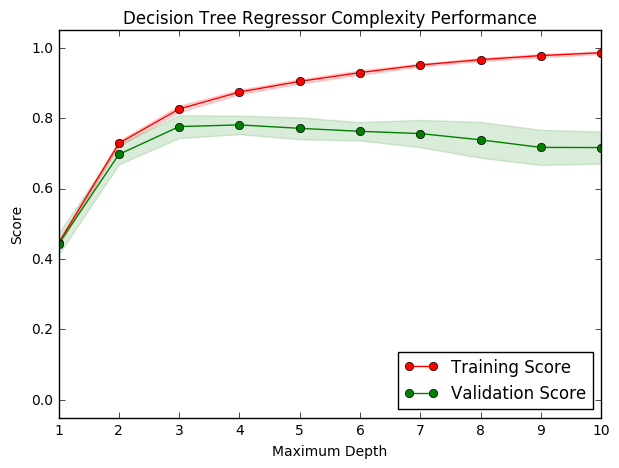

In [17]:
vs.ModelComplexity(X_train, y_train)

### Question 5 - Bias-Variance Tradeoff
*When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10? What visual cues in the graph justify your conclusions?*  
**Hint:** How do you know when a model is suffering from high bias or high variance?

**Answer: ** 
Learning curves help us see how various values of an hyperparamter like "max_depth" influence the model performance.

"max depth = 1": the model has a high bias because the training score is low, i.e. the training score has a high error. This is the case where the model is oversimplified and pays little attention to data.

"Max depth = 10": the model has a high variance because the validation score is much lower than the traininig score, i.e. the validation error is much higher than the training error. This is a case of overfitting where the model tries to learn artefacts/complexity which doesn't exist in the dataset.

Visually, I would say that the best trade-off between variance and bias is achieved with "max depth = 3" because this point corresponds to "almost the highest" validation score, and the validation score is the closest to the training score.

### Question 6 - Best-Guess Optimal Model
*Which maximum depth do you think results in a model that best generalizes to unseen data? What intuition lead you to this answer?*

**Answer: ** 

On the complexity curves, we can observe that the system goes from "underfitting" for low values of max_depth (the training score is low), to "overfitting" for higher values of max_depths (the difference between testing and training score is high).

The optimal model is where the training score is high and the validation score is at global maximum, i.e. at max_depth = 4

-----

## Evaluating Model Performance
In this final section of the project, you will construct a model and make a prediction on the client's feature set using an optimized model from `fit_model`.

### Question 7 - Grid Search
*What is the grid search technique and how it can be applied to optimize a learning algorithm?*

**Answer: **

The split between training set and testing set is an hyperparameter that must be calculated in different scenarios in order to take the optimal one. The grid search technique is a technique that calculates the performance of a model for several hyperparameters to find the optimal one, running all the possible values running a grid. Concretely, by finding the right "training/testing" split (thanks to grid search) one gets the optimal model, without having to visualize the model and take a "subjective" decision.

### Question 8 - Cross-Validation
*What is the k-fold cross-validation training technique? What benefit does this technique provide for grid search when optimizing a model?*  
**Hint:** Much like the reasoning behind having a testing set, what could go wrong with using grid search without a cross-validated set?

**Answer: **

The K-fold technique is a cross validation technique where the dataset is randomly split into k different subsets. The K-fold technique runs a loop for K where {it trains a model on the (K-1) subset and test it with the K'i testing set, store the performance results}, then averages the results of these K iterations to produce a single performance result (prediction accuracy). 

This technique has the advantage that no datapoint gets forgotten in neither testing nor training. It is also a very helpful technique in the cases where a dataset hasn't many datapoints and where taking a datapoint out of the dataset (for testing reasons) might have an impact on the model accuracy. This is also a powerful technique to calculate a more accurate estimate of the model performance.

### Implementation: Fitting a Model
Your final implementation requires that you bring everything together and train a model using the **decision tree algorithm**. To ensure that you are producing an optimized model, you will train the model using the grid search technique to optimize the `'max_depth'` parameter for the decision tree. The `'max_depth'` parameter can be thought of as how many questions the decision tree algorithm is allowed to ask about the data before making a prediction. Decision trees are part of a class of algorithms called *supervised learning algorithms*.

In addition, you will find your implementation is using `ShuffleSplit()` for an alternative form of cross-validation (see the `'cv_sets'` variable). While it is not the K-Fold cross-validation technique you describe in **Question 8**, this type of cross-validation technique is just as useful!. The `ShuffleSplit()` implementation below will create 10 (`'n_splits'`) shuffled sets, and for each shuffle, 20% (`'test_size'`) of the data will be used as the *validation set*. While you're working on your implementation, think about the contrasts and similarities it has to the K-fold cross-validation technique.

For the `fit_model` function in the code cell below, you will need to implement the following:
- Use [`DecisionTreeRegressor`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) from `sklearn.tree` to create a decision tree regressor object.
  - Assign this object to the `'regressor'` variable.
- Create a dictionary for `'max_depth'` with the values from 1 to 10, and assign this to the `'params'` variable.
- Use [`make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html) from `sklearn.metrics` to create a scoring function object.
  - Pass the `performance_metric` function as a parameter to the object.
  - Assign this scoring function to the `'scoring_fnc'` variable.
- Use [`GridSearchCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) from `sklearn.grid_search` to create a grid search object.
  - Pass the variables `'regressor'`, `'params'`, `'scoring_fnc'`, and `'cv_sets'` as parameters to the object. 
  - Assign the `GridSearchCV` object to the `'grid'` variable.

In [18]:
# TODO: Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer, r2_score
from sklearn.model_selection import GridSearchCV

def fit_model(X, y):

    # print X.shape[0] # = 293
    cv_sets = ShuffleSplit(n_splits = 10, test_size = 0.20, train_size = None, random_state = 21)
    # print cv_sets.get_n_splits(X)

    regressor = DecisionTreeRegressor(random_state=21)
     
    params = {'max_depth':(1,2,3,4,5,6,7,8,9,10)}
    # print params, ""
   
    scoring_fnc = make_scorer(r2_score)
     
    grid = GridSearchCV(estimator = regressor, param_grid = params, scoring = scoring_fnc, cv = cv_sets)
          
    grid = grid.fit(X,y)
    print ""
    # Return the optimal model after fitting the data
    return grid.best_estimator_

### Making Predictions
Once a model has been trained on a given set of data, it can now be used to make predictions on new sets of input data. In the case of a *decision tree regressor*, the model has learned *what the best questions to ask about the input data are*, and can respond with a prediction for the **target variable**. You can use these predictions to gain information about data where the value of the target variable is unknown — such as data the model was not trained on.

### Question 9 - Optimal Model
_What maximum depth does the optimal model have? How does this result compare to your guess in **Question 6**?_  

Run the code block below to fit the decision tree regressor to the training data and produce an optimal model.

In [19]:
# Fit the training data to the model using grid search
# import sklearn
# print('The scikit-learn version is {}.'.format(sklearn.__version__))

reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print "Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth'])


Parameter 'max_depth' is 4 for the optimal model.


**Answer: **

The answer to the question is "4 is the value for 'max_depth' for the optimal model".


### Question 10 - Predicting Selling Prices
Imagine that you were a real estate agent in the Boston area looking to use this model to help price homes owned by your clients that they wish to sell. You have collected the following information from three of your clients:

| Feature | Client 1 | Client 2 | Client 3 |
| :---: | :---: | :---: | :---: |
| Total number of rooms in home | 5 rooms | 4 rooms | 8 rooms |
| Neighborhood poverty level (as %) | 17% | 32% | 3% |
| Student-teacher ratio of nearby schools | 15-to-1 | 22-to-1 | 12-to-1 |
*What price would you recommend each client sell his/her home at? Do these prices seem reasonable given the values for the respective features?*  
**Hint:** Use the statistics you calculated in the **Data Exploration** section to help justify your response.  

Run the code block below to have your optimized model make predictions for each client's home.

Predicted selling price for Client 1's home: $407,400.00
Predicted selling price for Client 2's home: $230,508.51
Predicted selling price for Client 3's home: $888,720.00


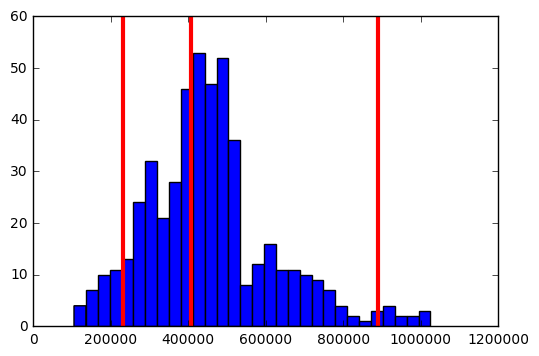

In [20]:
# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print "Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price)
    
plt.hist(prices, bins = 30)
for price in reg.predict(client_data):
    plt.axvline(price, c = 'r', lw = 3)

**Answer: **
Based on the statistics, tail and head datapoints from "Data Exploration" and from the histogram, here are my predictions:

Client 1 : $ 420.000

Client 2 : $ 250.000

Client 3 : $ 950.000

#

Predicted selling price for Client 1's home: $412,860.00

Predicted selling price for Client 2's home: $222,308.33

Predicted selling price for Client 3's home: $934,309.09

This means that the price is:
- positively correlated with the amount of rooms
- negatively correlated with the student-to-teacher ratio
- negatively correlated with the neighborhood poverty level. 

Regarding my answers to question 1:
- total amount of rooms in home: my intuition was right
- neighborhood poverty level: my intuition was right
- Student-teacher ratio of nearby schools: it was not clear for me, now it is

..but then it might be that "student-teacher ratio" and "neighborhood poverty level" are correlated with each other, i.e. that both features are linked to each other in some way...


### Sensitivity
An optimal model is not necessarily a robust model. Sometimes, a model is either too complex or too simple to sufficiently generalize to new data. Sometimes, a model could use a learning algorithm that is not appropriate for the structure of the data given. Other times, the data itself could be too noisy or contain too few samples to allow a model to adequately capture the target variable — i.e., the model is underfitted. Run the code cell below to run the `fit_model` function ten times with different training and testing sets to see how the prediction for a specific client changes with the data it's trained on.

In [21]:
vs.PredictTrials(features, prices, fit_model, client_data)


Trial 1: $391,183.33

Trial 2: $411,417.39

Trial 3: $415,800.00

Trial 4: $420,622.22

Trial 5: $413,334.78

Trial 6: $411,931.58

Trial 7: $399,663.16

Trial 8: $407,232.00

Trial 9: $402,531.82

Trial 10: $413,700.00

Range in prices: $29,438.89


### Question 11 - Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

**Answer: **

--- How relevant today is data that was collected from 1978?
I don't know how Boston has grown and evolved over the past (almost) 40 years, but I can imagine that the density has changed in many places, with new areas "renovated" or areas where the amount of rooms has increased etc... So I would extremly careful about using this model for predicting current home prices. In our fast-paced world, time (inflation!) has always an impact on models.

--- Are the features present in the data sufficient to describe a home?
While real estate professionals all say "location is always the most important predictor for a home price", I think the 3 features are not enough to describe a home. The answer to question 4 tells us there is a bias in the model and the answers to question 10 show there is a high variability / variance and possibly a strong correlation between "student-teacher ratio" and "neighborhood poverty level": in that case, this would mean that our model is only based on 2 features, not 3.

--- Is the model robust enough to make consistent predictions?
No. The answer to question 4 tells us there is a bias in the model and the answers to question 10 shows there is a high variability / variance: almost $70.000 variation on 10 tests. We have an optimum bias/variance at max_depth = 4 but the model has still a high bias and a high variance.

--- Would data collected in an urban city like Boston be applicable in a rural city?
No. The architectures and topologies of rural cities are different from urban cities, leading most likely to other features being good predictors of home prices. This would lead to a model with a different complexity, i.e. a model that needs to be built based on the dataset of this rural city. Moreover, the price levels are completely different between rural and urban cities: applying a urban model to calculate rural prices will certainly introduce a bias in the home prices (= will generate too high prices)... 
Broadly spoken, it is very difficult to generalize models from one context to another one. If there is no other solution than applying an urban model to a rural one, then it is of utmost important to test carefully to understand how it performs in the nex context.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.